# Programming with Data Midterm Assignment : Keean Ferreira
## Introduction:

In this project, I've chosen to explore the latest United Nations Happiness Report (2021).
I want to explore the dataset and find correlations between certain statistics that could further explain the gap between the Healthy Life Expectancies at Birth of varying countries. 

## Project Background and Aims: 

This topic is of interest to me because there are so many different countries, each with their own internal politics and unique situations. I want to see what lines can be drawn between the statistics on the dataset that might provide a deeper understanding of how we can close the gap between 1st world and 3rd world countries.

A key point of interest for me - living in a country where I feel the presidential body is filled with corruption and dishonesty (South Africa), I want to further explore the way in which a president addresses his nation, to observe what effect it might have on the demographics of the country. This idea came to me when watching Singapore's presidential speech, and noting to myself the joy that the president seemed to be addressing his nation with. It was a sort of joy that felt unfamiliar to me - and upon reflecting, I realized that when I listen to my own president speak, it feels as though I am listening to an emotionless script.

#### Questions that we want to answer:
    - Does the manner in which a president addresses their nation affect the nations happiness/health?
    - What correlations can be drawn between the statistics in the dataset?
    - How can we use these correlations to close the gap between 1st and 3rd world countries?
    

## Data Aquisition:

There are two types of data that I will be working with in this projec, and thus, two parts of data aquisition:

1. The United Nations World Happiness Report, downloaded directly from their website and exported into an excel file.
    - https://worldhappiness.report/
2. Two presidential Speeches that I scraped from their respective governmental websites.
    - Singapore https://www.pmo.gov.sg/Newsroom/National-Day-Rally-2019"
    - Mongolia https://president.mn/en/2021/04/23/the-presidents-address-to-the-nation-on-protecting-mongolias-democracy/
3. One presidential speech that was sourced from its website and copied onto a text file locally.
    - Chad https://www.c-span.org/video/?415588-101/president-obama-addresses-un-general-assembly&event=415588&playEvent
    
Before I proceed with the data aquisition, I will first download and install all necessary libraries

For chronological logic, I will work with the dataset first, and speeches second.

In [23]:
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install beautifulsoup4

import numpy as np

# Importing the Pandas Library that we will use to manipulate the dataframes
import pandas as pd

# Importing NLTK for language processing purposes.
import nltk
from nltk.corpus import webtext
from nltk import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Detecting sentiment - the easy way
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Lexicon that quantifies polar sentiment (positive/negative)
nltk.download('vader_lexicon')
analyzer=SentimentIntensityAnalyzer()

# Importing wordcloud to create a wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt

#Importing BeautifulSoup4 that we will use for web scraping purposes.
from bs4 import *
import urllib3

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/keeanferreira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/keeanferreira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keeanferreira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/keeanferreira/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Loading in primary dataset:

In [24]:
# Loading in the excel datasheet locally, and creating a Pandas DataFrame from it.
df = pd.read_excel (r'Data/Happiness Report 2021.xlsx')
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735400,7.984372,0.768425,54.400002,0.732971,-0.094634,0.723612,0.737636,0.208555
1945,Zimbabwe,2017,3.638300,8.015738,0.754147,55.000000,0.752826,-0.097645,0.751208,0.806428,0.224051
1946,Zimbabwe,2018,3.616480,8.048798,0.775388,55.599998,0.762675,-0.068427,0.844209,0.710119,0.211726
1947,Zimbabwe,2019,2.693523,7.950132,0.759162,56.200001,0.631908,-0.063791,0.830652,0.716004,0.235354


## Data Cleansing:
As we can see above, there is a lot of data.

Each statistic in this dataset tells us something different but I will specifically foucs on the "Healthy life expectancy at birth", as I feel it is a clear indicator of whether a country's development is below or above average. 

In [25]:
# Sorting data by "Healthy life expectancy at birth"
df.sort_values(by=['Healthy life expectancy at birth'], ascending=True)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
676,Haiti,2010,3.765999,7.384417,0.554031,32.299999,0.372941,0.215561,0.848007,0.554960,0.292557
677,Haiti,2011,4.844574,7.423120,0.567039,36.860001,0.412588,0.242585,0.681960,0.625240,0.244856
1509,Sierra Leone,2006,3.628185,7.136178,0.561356,40.299999,0.679001,0.100581,0.836166,0.505072,0.380655
675,Haiti,2008,3.846329,7.416673,0.679098,40.380001,0.464971,0.260972,0.811659,0.607697,0.255774
1634,Swaziland,2011,4.867091,8.940104,0.837150,40.808292,0.607157,-0.066733,0.917250,0.820613,0.251053
...,...,...,...,...,...,...,...,...,...,...,...
1677,Taiwan Province of China,2016,6.512851,10.854927,0.894989,NaN,0.718925,-0.048804,0.810521,0.833153,0.108305
1678,Taiwan Province of China,2017,6.359451,10.870996,0.891119,NaN,0.759655,-0.070494,0.742780,0.837277,0.114123
1679,Taiwan Province of China,2018,6.467005,NaN,0.896459,NaN,0.741033,NaN,0.735971,0.848399,0.092696
1680,Taiwan Province of China,2019,6.537090,NaN,0.893431,NaN,0.814484,NaN,0.718112,0.860071,0.093412


The DataFrame clearly contains Null/NaN values which are no good. Lets remove them..

In [48]:
# Here we count the amount of missing values in the entire DataFrame.
print("Number of NaN values: ", df.isnull().values.sum())

# Removing all rows that contain NaN values
df2 = df.dropna()

# Counting the NaN values again.
print("Number of NaN values: ", df2.isnull().values.sum())

Number of NaN values:  373
Number of NaN values:  0


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735400,7.984372,0.768425,54.400002,0.732971,-0.094634,0.723612,0.737636,0.208555
1945,Zimbabwe,2017,3.638300,8.015738,0.754147,55.000000,0.752826,-0.097645,0.751208,0.806428,0.224051
1946,Zimbabwe,2018,3.616480,8.048798,0.775388,55.599998,0.762675,-0.068427,0.844209,0.710119,0.211726
1947,Zimbabwe,2019,2.693523,7.950132,0.759162,56.200001,0.631908,-0.063791,0.830652,0.716004,0.235354


We have successfully removed the NaN values..

In [60]:
#Calculating life expectancy mean and min

life_expectancy_average = float(np.mean(df2["Healthy life expectancy at birth"]))
life_expectancy_min = np.min(df2["Healthy life expectancy at birth"])

column = df2["Healthy life expectancy at birth"]

min_value = column.idxmin()
min_value = df2.loc[min_value]

print("Life Expectancy mean: ", life_expectancy_average, " and min: ", life_expectancy_min)

print(min_value)

Life Expectancy mean:  63.225466107317104  and min:  32.2999992370605
Country name                            Haiti
year                                     2010
Life Ladder                          3.765999
Log GDP per capita                   7.384417
Social support                       0.554031
Healthy life expectancy at birth    32.299999
Freedom to make life choices         0.372941
Generosity                           0.215561
Perceptions of corruption            0.848007
Positive affect                       0.55496
Negative affect                      0.292557
Name: 676, dtype: object


As we can see, there are abnormally low values in the "Healthy life expectancy at birth". 
This low value is from Haiti in 2010, which was struck by a natural disaster (earthquake) in which roughly 250,000 lives were lost. This explains why the life expectancy is so low. 

Although the data is not erraneous, it still distorts the dignity of the data.

As a treatment to this problem, we will alter the lens through which we analyse the data by removing anything that that is above or below the value +/- (2.5 * the standard deviation).

In [61]:
life_expectancy_std = np.std(df2["Healthy life expectancy at birth"])

# print(np.mean(df2["Healthy life expectancy at birth"]))

df7 = df2.copy()
df7 = df7.sort_values(by=['Healthy life expectancy at birth'], ascending=True)

# iterating through the Life Expectancy values, to see which values are above or below our standard, and then removing them
for cell in df7["Healthy life expectancy at birth"]:
    if (cell < (life_expectancy_average - (2.5*life_expectancy_std)) or cell > (life_expectancy_average + (2.5*life_expectancy_std))):
        cell_index = df7.index[df7["Healthy life expectancy at birth"]== cell]
        df7 = df7.drop(cell_index)
df7

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1267,Nigeria,2006,4.709746,8.326130,0.735179,44.119999,0.649140,0.084854,0.870749,0.781400,0.178237
1936,Zimbabwe,2008,3.174264,7.461205,0.843475,44.139999,0.343556,-0.089681,0.963846,0.630983,0.250060
315,Chad,2008,4.632468,7.355508,0.570835,44.139999,0.526610,0.062640,0.943554,0.569130,0.225484
1920,Zambia,2006,4.824455,7.817309,0.797665,44.259998,0.720972,-0.005999,0.785281,0.700788,0.226278
1513,Sierra Leone,2011,4.501644,7.292360,0.781581,44.320000,0.769738,0.004522,0.854647,0.445804,0.299528
...,...,...,...,...,...,...,...,...,...,...,...
1529,Singapore,2015,6.619525,11.400499,0.866437,75.900002,0.886891,0.149670,0.098944,0.803124,0.141585
1530,Singapore,2016,6.033481,11.419444,0.925128,76.199997,0.903736,0.142908,0.047311,0.823989,0.110942
1531,Singapore,2017,6.378438,11.461011,0.897350,76.500000,0.926128,0.135582,0.161791,0.800114,0.179325
1532,Singapore,2018,6.374564,11.490117,0.902841,76.800003,0.916078,-0.065856,0.096563,0.787093,0.106871


Now we have removed nonsensical values from our average life expectancy, and can proceed with data analysis.

## Data Analysis:
I will begin to look at the dataset in different ways, plotting graphs based on varying statistics. This will allow us to gain a feel on where the connections may lie.

Within the dataset, each country has entries from years 2009-2020. To level my analysis onto an even playing field, I will collect the data from a more recent year - 2019. 

Not all the countries have entries for 2020, so that would be an unreliable source of data.

In [64]:
# df3 is a new dataframe that contains only entries from 2019.
df3 = df7[df7["year"] == 2019]

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Healthy life expectancy at birth'>

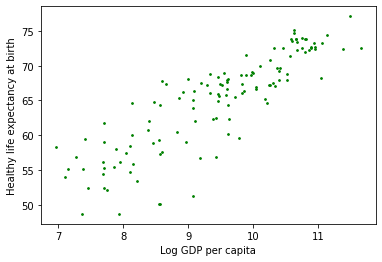

In [65]:
df3.plot.scatter(x = 'Log GDP per capita', y = 'Healthy life expectancy at birth', s = 3, c = 'Green')

Above we have a scattered plotting of the "Health life expectancy at birth" against the "Log GDP per capita".

It is extremely clear that there is a strong correlation. 

This is expected because Log GDP/capita directly correlates to the quantity and quality of medical services that the country produces, and whether or not their supply meets the populations demands.

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Life Ladder'>

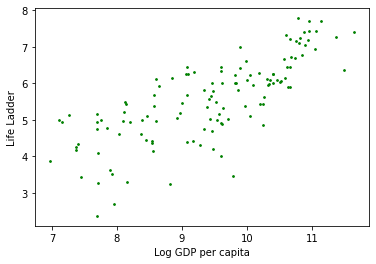

In [66]:
df3.plot.scatter(x = 'Log GDP per capita', y = 'Life Ladder', s = 3, c = 'Green')

    The life ladder is a measurement spectrum from 0 - 10, where 0 is the worst possible life being lived, 
    and 10 is the best possible life being lived.
    
Above we can also see that the Log GDP/capita directly correlates to the "Life ladder". This is in alignment with the premise of the previous scatter graph.

This tells us that the Log GDP/capita has a huge influence on the happiness/health of a country. In both the sense that a higher Log GDP/capita indicates that a country produces quality products and services, and has enough supply to meet the citezens' demand.

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Perceptions of corruption'>

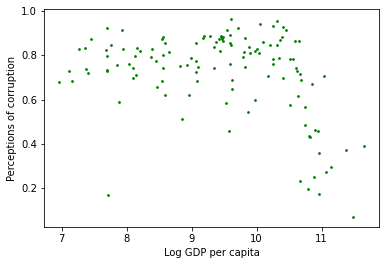

In [67]:
df3.plot.scatter(x = 'Log GDP per capita', y = 'Perceptions of corruption', s = 3, c = 'Green')

To further exand on the Log GDP/capita, we can see that as soon as Log GDP/capita goes above 10.5, perceptions of corruption decrease significantly. 

This tells us that when a country has an infrastructure that produces a plethora of goods and services (has a high GDP/capita), the populations feels as though the governing body puts tax money to good use.

Next we observe the correlation between the population and the freedom they feel to make their own choices and their expressions of social support.

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Social support'>

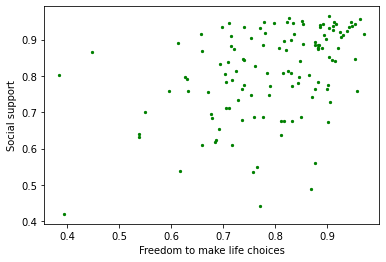

In [68]:
df3.plot.scatter(x = 'Freedom to make life choices', y = 'Social support', s = 5, c = 'Green')

There is a loose correlation between "Social Support" and "Freedom to make life choices", but one can obeserve where the majority of the points populate. To get a clearer image, we can plot a graph using all the entries (2009-2020). 

Let us make it blue this time.

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Social support'>

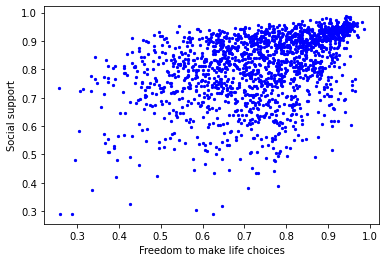

In [69]:
df2.plot.scatter(x = 'Freedom to make life choices', y = 'Social support', s = 5, c = 'Blue')

We can definitely see that the lower "Freedom to make life choices" goes, the lower the "Social Support" becomes.

Below, we can observe that there is a weak correlation between "Generosity" and "Freedom to make life choices".

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Generosity'>

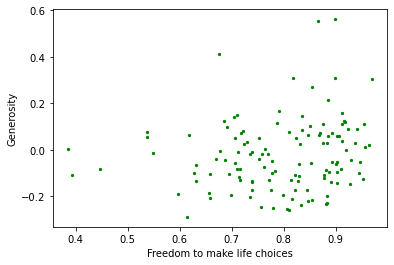

In [70]:
df3.plot.scatter(x = 'Freedom to make life choices', y = 'Generosity', s = 5, c = 'Green')

But once again, if we add in all the entries, a clearer pattern emerges.

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Generosity'>

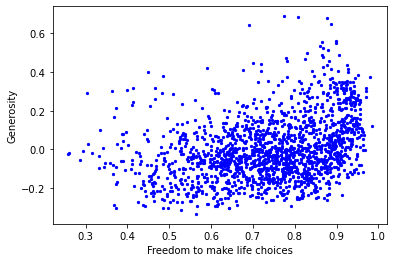

In [71]:
df2.plot.scatter(x = 'Freedom to make life choices', y = 'Generosity', s = 5, c = 'Blue')

We can see that a "Generosity" is generally low, and "Freedom" has a relatively evenly-scattered set of points, but we can observe that when "Freedom" increases above 0.7, then the maximum "Generosity" also climbs significantly.

In [72]:
# Sorting data by "Healthy life expectancy at birth"
df3.sort_values(by=['Generosity'], ascending=False)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1189,Myanmar,2019,4.434237,8.545227,0.762995,59.299999,0.899064,0.561138,0.681796,0.754618,0.285576
760,Indonesia,2019,5.346513,9.376888,0.801918,62.299999,0.865859,0.555348,0.860785,0.876714,0.301703
590,Gambia,2019,5.163627,7.699350,0.693870,55.299999,0.676595,0.410180,0.798108,0.772816,0.400723
903,Kenya,2019,4.618850,8.373293,0.675932,60.700001,0.817757,0.310065,0.794370,0.751439,0.250687
1725,Thailand,2019,6.022151,9.823529,0.903051,67.400002,0.898245,0.308830,0.877040,0.842873,0.208184
...,...,...,...,...,...,...,...,...,...,...,...
1172,Morocco,2019,5.056752,8.924619,0.534804,66.199997,0.756748,-0.244314,0.756867,0.588883,0.409912
1014,Lithuania,2019,6.064098,10.517996,0.917578,67.900002,0.780266,-0.251475,0.782501,0.566024,0.276054
858,Japan,2019,5.908039,10.631743,0.877651,75.099998,0.806472,-0.254619,0.617188,0.742844,0.194410
604,Georgia,2019,4.891836,9.616757,0.674976,64.300003,0.810534,-0.259722,0.647223,0.604491,0.243710


Interestingly enough, Myanmar has the highest generoisty and Greece the lowest for 2019, even though most of Greece's statistics (Log GDP/capita, Life Ladder, Social Support etc) are generally higher than that of Myanmar.

Greece's "Freedom to make life choices" is significantly low and its "Perceptions of corruption" is quite high.

This tells us that despite Greece's Log GDP/Capita being rather high - the country seems to be hindered by a governing body that supresses their freedom of choices and acts in a corrupt manner, which in turn hinders the amount of generosity that the population can show each other.

Key Takeaway: 

1. There is a clear correlation between "Perception of corruption" and "Freedom to make life choices. If Corruption is up, then there is likely suppression of free will happening.
2. There is a clear correlation between "Social support", "Generosity" and "Freedom to make life choices". With less freedom, and an increased sense of a corrupt governing body, the individuals in the population feel more inclined to act only for themselves, refraining from making charitable donations, and loosening their bonds to their fellow citezens by lowering their contributions to upholding a social circles.

This is evident in the below graph.


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Perceptions of corruption'>

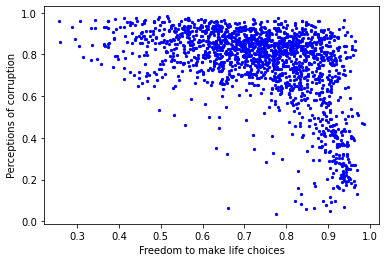

In [73]:
df2.plot.scatter(x = 'Freedom to make life choices', y = 'Perceptions of corruption', s = 5, c = 'Blue')

To answer my question, "Does the manner in which a president addresses their nation affect the populations happiness, health, and ultimately, their wealth?", I will take 3 sample countries from our data, based off of the "Healthy life expectancy at birth":

1. Maximum Sample
2. Average Sample
3. Minimum Sample

In [74]:
df4 = df3.sort_values(by=['Healthy life expectancy at birth'], ascending=False)

column = df4["Healthy life expectancy at birth"]

# Getting max Life Expectancy
max_value = column.idxmax()
max_value = df4.loc[max_value]

# Getting min Life Expectancy
min_value = column.idxmin()
min_value = df4.loc[min_value]

# avg_value = df4.loc[(df4["Healthy life expectancy at birth"] == round(df4["Healthy life expectancy at birth"].mean(), 0))]

print(max_value)
print(min_value)

Country name                        Singapore
year                                     2019
Life Ladder                           6.37836
Log GDP per capita                   11.48598
Social support                       0.924918
Healthy life expectancy at birth    77.099998
Freedom to make life choices         0.938042
Generosity                            0.02723
Perceptions of corruption             0.06962
Positive affect                      0.722598
Negative affect                      0.138069
Name: 1533, dtype: object
Country name                          Lesotho
year                                     2019
Life Ladder                          3.511781
Log GDP per capita                   7.925777
Social support                       0.789705
Healthy life expectancy at birth    48.700001
Freedom to make life choices         0.716314
Generosity                          -0.130536
Perceptions of corruption            0.914951
Positive affect                       0.73488
Negative

In [76]:
# For the average
avg_value = (column.min() + column.max())/2
round(avg_value, 1)


62.9

The value between the min and the max is 62.9.

For the purpose of this project, I will use Mongolia as the Middle value, since its "Healthy life expectancy" is 62.5.

Above, we can see that:

1. Maximum - Singapore with 77
2. Minimum - Chad with 48.7
3. Medium - Mongolia with 62.5

### Data Aquisition: Part 2
Now I will proceed to compare the way in which the presidents of the above three countries addresses their nations.

To do this, I will take numerous steps:
 


In [77]:
# These are the web pages we will pull data from
singaporeSpeech = "https://www.pmo.gov.sg/Newsroom/National-Day-Rally-2019"
mongoliaSpeech = "https://president.mn/en/2021/04/23/the-presidents-address-to-the-nation-on-protecting-mongolias-democracy/"
chadSpeech = "https://www.c-span.org/video/?415588-101/president-obama-addresses-un-general-assembly&event=415588&playEvent"

# Pull the date from the web page
http = urllib3.PoolManager()

# Sending an HTTP request to the webservers
singaporeResponse = http.request('GET', singaporeSpeech)
mongoliaResponse = http.request('GET', mongoliaSpeech)

# Create a Beautiful Soup object from the response and pass in the page data
singaporeSoup = BeautifulSoup(singaporeResponse.data, "lxml")
mongoliaSoup = BeautifulSoup(mongoliaResponse.data, "lxml")

# Scraping the data using the appropriate HTML element tags and class names
singaporeSpeech = str(singaporeSoup.find_all("div", class_ ="row qna"))
mongoliaSpeech = str(mongoliaSoup.find_all("div", class_ ="entry-content"))

# Define function to remove html tags 
def remove_tags(html):
  
    # Parse html content
    soup = BeautifulSoup(html, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # Return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

# Remove HTML tags from the speeches
singaporeSpeech = remove_tags(singaporeSpeech)
mongoliaSpeech = remove_tags(mongoliaSpeech)

# The Chad speech was imported locally
chadSpeechFile = open("Data/Speech3.txt", "r")
chadSpeech = chadSpeechFile.read()
chadSpeechFile.close()

In [78]:
# Define a helper function to plot freq dist of words in a list of lists
def plotfreq(x, title = ""):
    flat = []
    for i in x:
        flat += 1
    f = nltk.FreqDist(flat)
    
    plt.figure(figsize=(12, 3))
    plt.title(title)
    f.plot()
    
    
def processHTML(corpusData):

    sentence = corpusData

    # Now we 'standardise' the text to lowercase using sentence.lower(). 

    sentence = sentence.lower()

    # Initializing punctuation tokenizer

    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(sentence)

    # This is one way to remove stopwords
    filtered = [word for word in tokens if not word in stopwords.words()]

    # Here we create a dictionary storing the frequency of each word
    counter = {}
    for i in filtered:
        if i in counter:
            counter[i] += 1
        else:
            counter[i] = 1

    f_dist = FreqDist(tokens)
    fd = nltk.FreqDist(filtered)

    # Plotting frequency graph for words
    fd.plot(20,cumulative=False, title="My first frequency distribution.")

    # Using filtered words list from the previous cell and joining the words
    concatenated_strings = " ".join(filtered)

    print(analyzer.polarity_scores(concatenated_strings))
    

Disclaimer: The below code does take +- 30 seconds to process, please be patient.

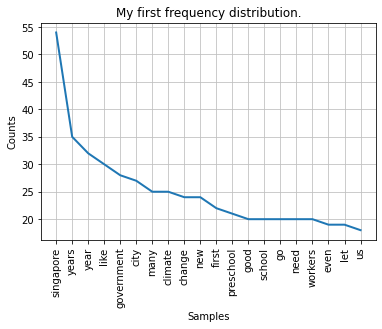

{'neg': 0.054, 'neu': 0.748, 'pos': 0.197, 'compound': 1.0}


In [79]:
processHTML(singaporeSpeech)

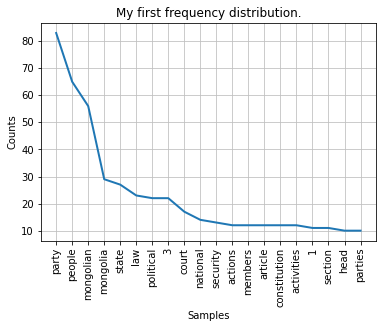

{'neg': 0.102, 'neu': 0.585, 'pos': 0.312, 'compound': 0.9999}


In [80]:
processHTML(mongoliaSpeech)

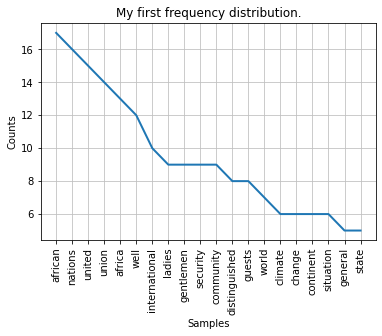

{'neg': 0.15, 'neu': 0.562, 'pos': 0.288, 'compound': 0.9993}


In [81]:
processHTML(chadSpeech)

## Observations:
After conducting a sentiment analysis on the presidential speeches, I observe the opposite of what I expected. Singapore, the country that I deemed to have the most joyful of presidents, proved to have the lowest "positive" sentiment of 0.197. Mongolia had the highest, with 0.312, and Chad sat between them, with 0.288. 

In a perfectly setting, with a sentiment analyser that worked 100%, I would proclaim that my hypothesis was disproven by these results. However, I do account for the fact that the tool used to conduct the analysis does have its flaws. For example, in the Mongolian speech, the president used the word "party" multiple times. 

Realistically, this indicates that his speech is very political based, refering to political parties. The analyser, on the other hand, is probably under the impression that the Mongolian president is having a good time - with all of his "partying".

So this leaves ground to cover in future research activities.

## Futher Research:
My previously mentioned point of the analyser not fully understanding context could leave room for further exploration in the future. Theoretically, I would search for a more advanced analyser, or deliberately remove the words that I feel the analyser is misunderstanding - however, that could also be problematic, because I don't fully know what the analyser is thinking. 


## Conclusion

    - Does the manner in which a president addresses their nation affect the nations happiness/health?
I definitely do think so. My analysis results disagree, but there are improvements to be made to my analysis approach, and I feel with those improvements, I will be able to find really supportive data to my question.

    - What correlations can be drawn between the statistics in the dataset?
Many. We have seem the correlations between a few statistics via our graphs. The main points that we can make are that clear connections between the governing bodies actions and those of the population - if the government is corrupt and suppressive, then the actions of the citezens tend to be more self-centered.

    - How can we use these correlations to close the gap between 1st and 3rd world countries?
The results discovered can be eye-opening for some. This is because it shows that the wellbeing and prosperity of a nation all begins with the leadership it has. With leaders that are self-centered and corrupt, the nation will begin to reflect those characteristics. In this case, when there are internal issues with a nation, we should look to the leaders to find the real cause of the problems.

## Ethical Statement:
I understand that the practices of web scraping may not always be legal. During this research project, I took precaution to search the websites that which I took the data from to see if web scraping was prohibited. The websites stated:

    "Except as otherwise provided, the Contents of this Web Site shall not be reproduced, republished, uploaded, 
    posted, transmitted or otherwise distributed in any way, without the prior written permission of PMO."
    
I personally emailed the Singaporian Governments website to attain permission to use their material, but received no response. I then decided that since the project is for educational purposes only, and I do not intent to alter, reproduce, or repost somewhere - that it would be safe to proceed.

I do however understand that the resources that I drew my data from may not be 100% accurate. For example, the lowest "Healty life expectancy at birth" on the dataset is roughly 32 years, but when I searched the internet to fact check that unbelievable fact, nothing supported it. 